# Prosper Loan Data exploration
## by Patrick Amaral

## Preliminary Wrangling

> Prosper try to facilitate to people get a loan, to do that person can invest in each other and institutions earn attractive returns, the dataset contain 81 variables.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [10]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [11]:
df.shape

(113937, 81)

In [12]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [14]:
# Default color to seaborn
color = sb.color_palette()[0]

### What is the structure of your dataset?

> 113937 row by 81 columns, has some variables missing data but I will not use.

### What is/are the main feature(s) of interest in your dataset?

> What increase the probability to get a loan and how the Prosper score could help?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - LoanOriginalAmount
> - Investors
> - BorrowersAPR
> - IncomeRange
> - Occupation
> - Term

## Univariate Exploration


In [16]:
df['ListingCategory (numeric)'].isnull().sum()

0

In [17]:
df['IncomeRange'].isnull().sum()

0

In [18]:
df['Occupation'].isnull().sum()

3588

In [19]:
len(df['Occupation'].value_counts())

67

> After taking a quick look in the data, I was interested to know for what people want a loan.

In [20]:
labels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 
'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
'RV', 'Taxes', 'Vacation', 'Wedding Loans']

df['ListingCategory'] = df['ListingCategory (numeric)'].apply(lambda x: labels[x])

In [21]:
counts = df['ListingCategory'].value_counts()
counts[:5]

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Name: ListingCategory, dtype: int64

In [24]:
counts[0]/df.shape[0]

0.5117564970115064

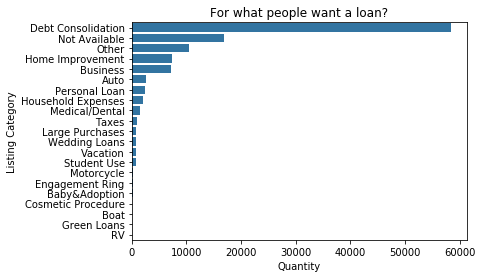

In [23]:
sb.countplot(data=df, y='ListingCategory', color=color, order=counts.index)
plt.xlabel('Quantity')
plt.ylabel('Listing Category')
plt.title('For what people want a loan?');

> Here we clearly could see that most people get a loan for debt consolidation, this is interesting, see this, Prosper could improve your marketing's public with this. It's nice to notice that has many people that opt to do not specify, as **Not Available** and **Other**.

> Now we know for what people get a loan at least the main reason, but it's also interesting to know how much is the borrower's income range.

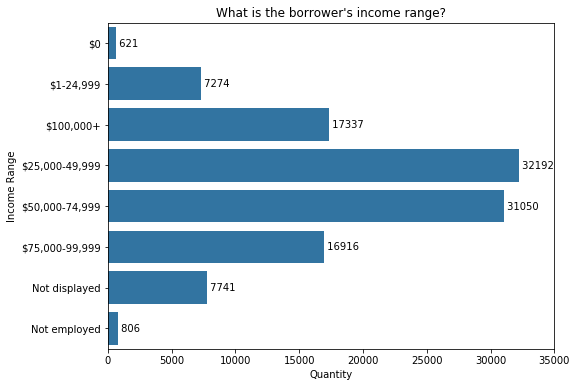

In [10]:
income_counts = df['IncomeRange'].value_counts()

plt.figure(figsize=(8,6))
sb.countplot(data=df, y='IncomeRange',color=color, order=income_counts.sort_index().index)

dist = income_counts.sort_index()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = dist[label.get_text()]
    pct_string = (' {} '.format(count))
    plt.text(count, loc, pct_string, va='center')

plt.xticks(np.arange(0, 40000, 5000))
plt.xlabel('Quantity')
plt.ylabel('Income Range')
plt.title('What is the borrower\'s income range?');

> There some curious data here, people with an income range of $0 did they can get a loan? and most of the borrowers earn between 25k to 75k.



> We need more information about the borrower's, now looking for their occupation.

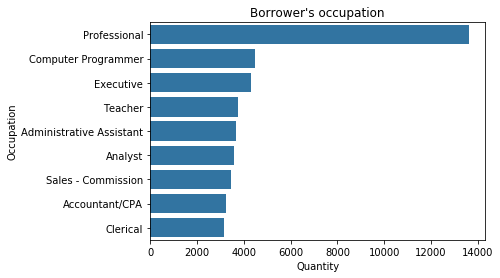

In [12]:
# Selecting just top 10 of list, and removing the option 'other'
order = df['Occupation'].value_counts()[1:10]
sub_data = df[df['Occupation'].isin(order.index)]

sb.countplot(data=sub_data, y='Occupation', order=order.index, color=color)
plt.xlabel('Quantity')
plt.title('Borrower\'s occupation');

> Borrower's occupation in many of this top 10 is involved with math or calculus that is interesting but 'professional' is like a null vote and is the biggest.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In these three plots I get categorical variables and for my analysis didn't need any transformation, Borrower's occupation was the one that a needed separate to put on the plot because there 67 different occupations.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Looking at this three plots, I notice that the loan was most used for **debt consolidation**, and looking at second plot there is an unusual point because it is strange that a large number of people with an income range of $ 0 can get a loan. About the third plot how I said there many people that work involving some math or calculus, and maybe this familiarity with number be more attractive and easier to understand.

## Bivariate Exploration

> Now using more than one variable, in Prosper's data, people can choose the term into 12, 36 and 60 months, which one is more chosen for Listing Category.

In [22]:
most_loan = counts[:5].index
sub_df = df[df['ListingCategory'].isin(most_loan)].copy()

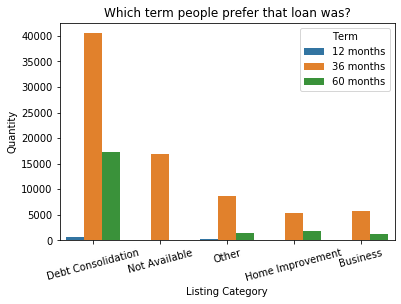

In [23]:
counts_sub = sub_df['ListingCategory'].value_counts()
g = sb.countplot(data=sub_df, x='ListingCategory', hue='Term', order=counts_sub.index)
g.set_xlabel('Listing Category')
g.set_ylabel('Quantity')
plt.title('Which term people prefer that loan was?')
plt.legend(['12 months','36 months','60 months'], title='Term')
plt.xticks(rotation = 15);

> Looking at this plot that I split into the 5 top categories, many people prefer 36 months than others this in whole plot list and reinforcing that people get a loan to debt consolidation.

> I'll do this again with the term but now looking for the years.

In [24]:
# Converting ListingCreationDate of object to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [25]:
df['ListingYear'] = df['ListingCreationDate'].apply(lambda x: x.year)

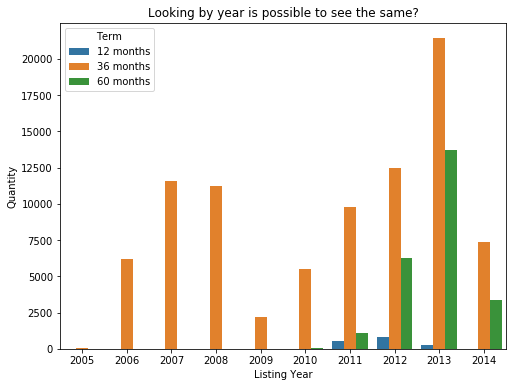

In [26]:
plt.figure(figsize=(8,6))
sb.countplot(data=df, x='ListingYear', hue='Term')
plt.title('Looking by year is possible to see the same?')
plt.xlabel('Listing Year')
plt.ylabel('Quantity')
plt.legend(['12 months', '36 months', '60 months'], loc='upper left', title='Term');

> Yes, it's possible to see the same thing, that 36 months is the most preferred, but here we notice at this plot starting in 2011 a great part of people began to opt for 60 months.

> Now I want to see whether has some relation between loan amount with investor seen that in Prosper web page they said people can invest in each other.

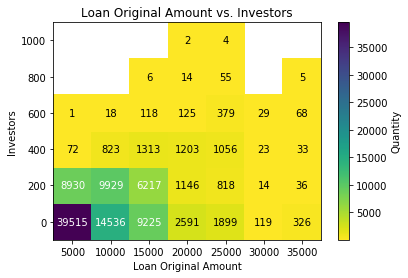

In [27]:
bins_x = np.arange(2500, 40000, 5000)
bins_y = np.arange(-100, 1200, 200)
h2d = plt.hist2d(data=df, x='LoanOriginalAmount', y='Investors', bins=[bins_x, bins_y], cmap='viridis_r', cmin=1)
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 5000: # increase visibility on darkest cells
            plt.text(bins_x[i]+2500, bins_y[j]+100, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+2500, bins_y[j]+100, int(c),
                     ha = 'center', va = 'center', color = 'black')
plt.xlabel('Loan Original Amount')
plt.ylabel('Investors')
plt.title('Loan Original Amount vs. Investors')
plt.colorbar(label='Quantity');

> I did this plot because I am interested to see if has some relation between Investors and Loan amount, we can notice in most cases that loan amount is of 5K don't have investors, but this increases with the loan but in most cases still without investors.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Using the relation with Term to see which one term people prefer, in most cases, people prefer 36 months but then looking by the year, we can notice that people start to prefer 60 months, being that 2005 to 2010 practically don't have anyone that choose 12 or 60 months. The last plot using a heatplot isn't a strong relationship but is possible to see that in main cases that loan amount is of 5K don't have many investors.

## Multivariate Exploration

> The relation between borrowerARP(Annual Percentage Rate) and Lender Yield but separate by Prosper Rating, for example, HR means most risk and AA means the least risk.

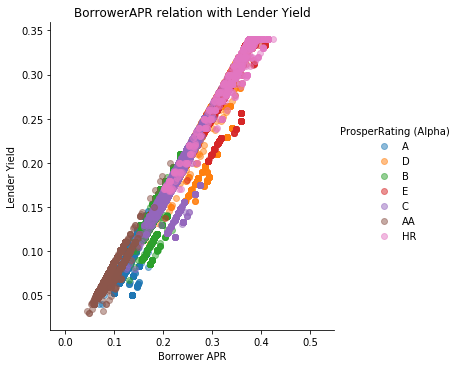

In [28]:
sb.lmplot(data=df, x='BorrowerAPR', y='LenderYield', hue='ProsperRating (Alpha)', fit_reg=False, scatter_kws={'alpha': 1/2})
plt.ylabel('Lender Yield')
plt.xlabel('Borrower APR')
plt.title('BorrowerAPR relation with Lender Yield');

> Interesting that borrowers with HR (High Risk) are those that get more yield, let's see better with the size of the loan amount. 

> I'm now interested to know if they follow the logic in Loan amount, looking by Prosper score and Prosper Rating

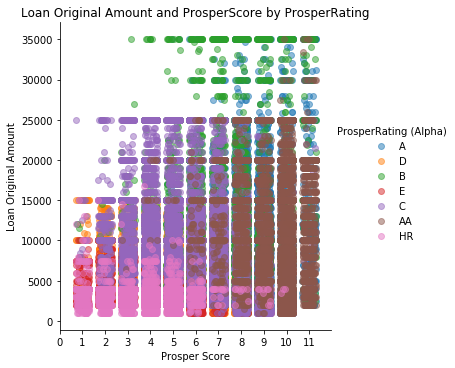

In [30]:
sb.lmplot(data=df, x='ProsperScore', y='LoanOriginalAmount', hue='ProsperRating (Alpha)',
          fit_reg=False, x_jitter=0.3, scatter_kws={'alpha': 1/2})
plt.title('Loan Original Amount and ProsperScore by ProsperRating')
plt.xlabel('Prosper Score')
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Loan Original Amount');

> Looking here and considering the last plot, is interesing that borrowers with HR (High Risk) got a loan amount at most 5K and they are those that most yield.

> Maybe is interesting to know some relation with the BorrowerAPR and ProsperScore

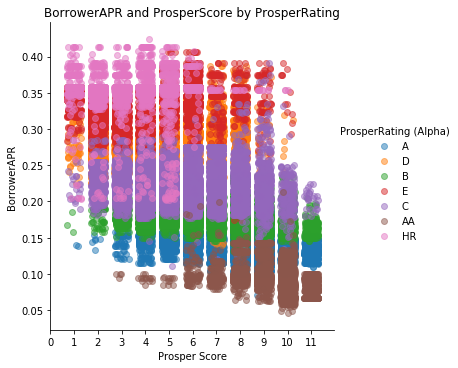

In [31]:
sb.lmplot(data=df, x='ProsperScore', y='BorrowerAPR', hue='ProsperRating (Alpha)', fit_reg=False, x_jitter=0.3, scatter_kws={'alpha': 1/2}, )
plt.title('BorrowerAPR and ProsperScore by ProsperRating')
plt.xticks(np.arange(0, 12, 1))
plt.xlabel('Prosper Score');

> This time we can see a discrete line decreasing, Prosper score grew up and the Prosper rating grow of HR to AA.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> An interesting part is in the second plot, in the bivariate plot we saw that many loan amount is of 5K and now we see that most their belong to the HR with a low score.

### Were there any interesting or surprising interactions between features?

> One that surprises me is looking by Borrowers annual percentage rate and lender yield because additionally when you look to a Prosper Rating that has a rating HR, is this one that gave more yield.